In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
sns.set_style("white")
#x_size, y_size = 12,8
plt.rcParams.update({'font.size': 12})

In [21]:
df = pd.read_csv("regression_results.csv")

In [22]:
f = open("data\\counters_per_route.txt", encoding="utf8")
routes = []

for l in f:
    if l.startswith("#") or (l == "\n"):
        continue
    ss = l.strip().split(";")
    route_id = ss[0] 
    routes.append(route_id)
    #route_id = int(route_id)

routes

['Dunajska (from centre)',
 'Dunajska (to centre)',
 'Ižanska (from centre)',
 'Ižanska (to centre)',
 'Slovenska (from centre)',
 'Slovenska (to centre)',
 'Škofije (towards Koper)',
 'Škofije (towards Trieste)']

In [23]:
# feature_labels
def set_feature_labels(features, sep="\n"):
    features=features.replace("'","").replace("[","").replace("]","").replace('"','')
    features=features.replace("workday, weather, time_x, time_y", "basic")
    features=features.replace("900000","")
    features=features.replace(" ","")
    features=features.replace(",",sep)
    
    return features

In [24]:
df['feature_labels'] = df['features'].map(set_feature_labels)

### Models and features

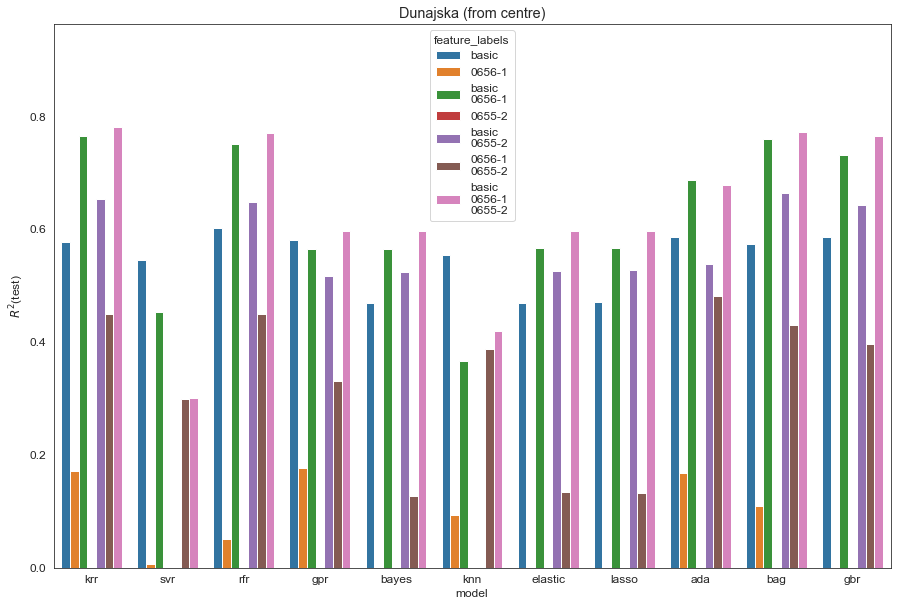

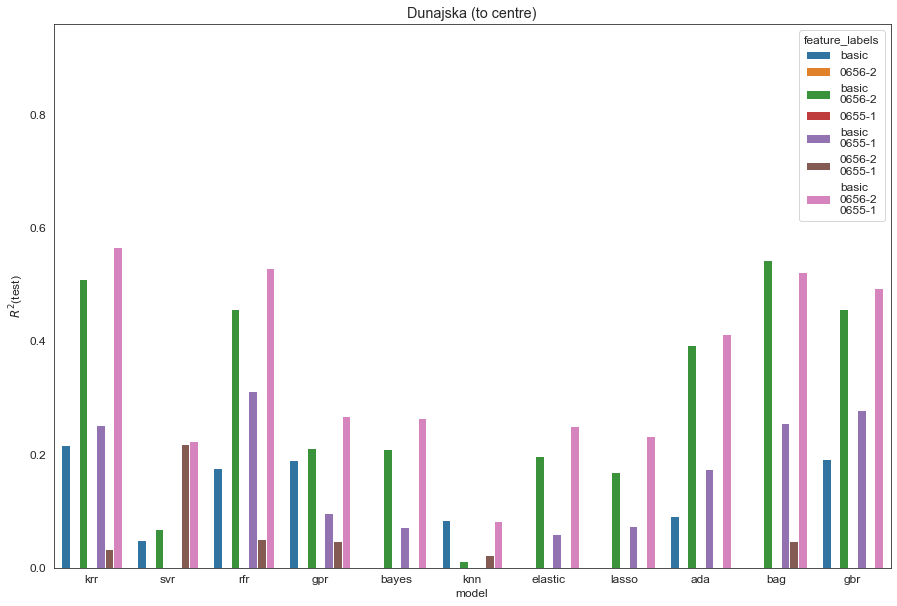

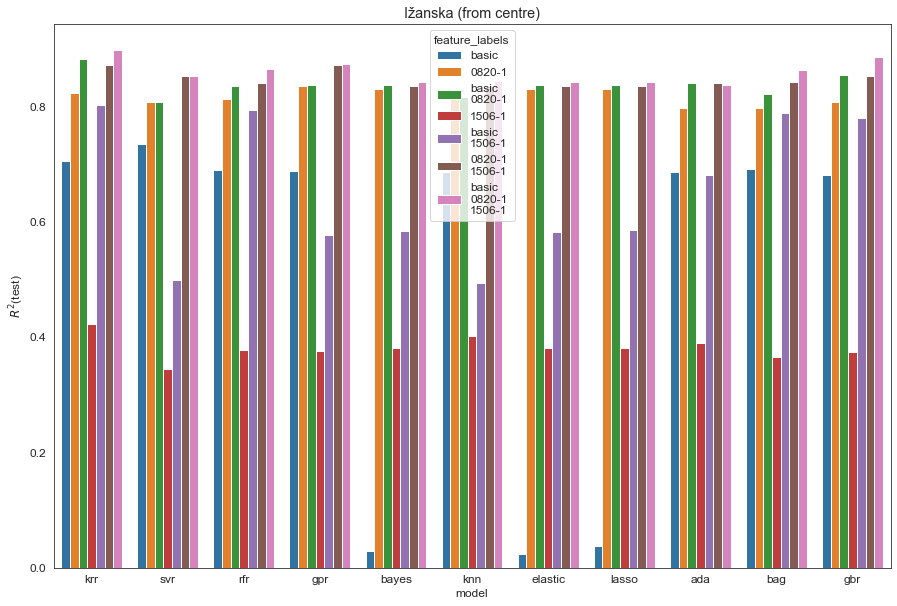

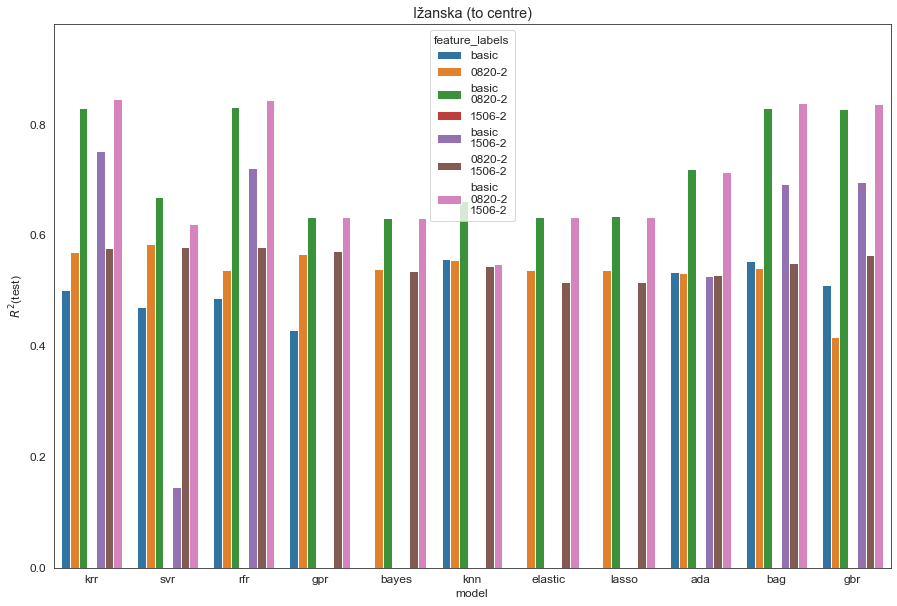

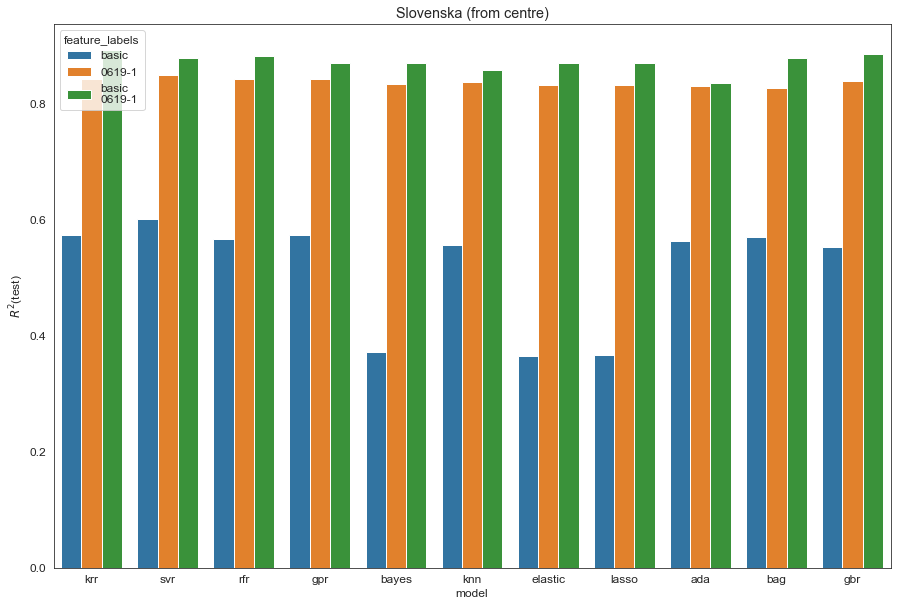

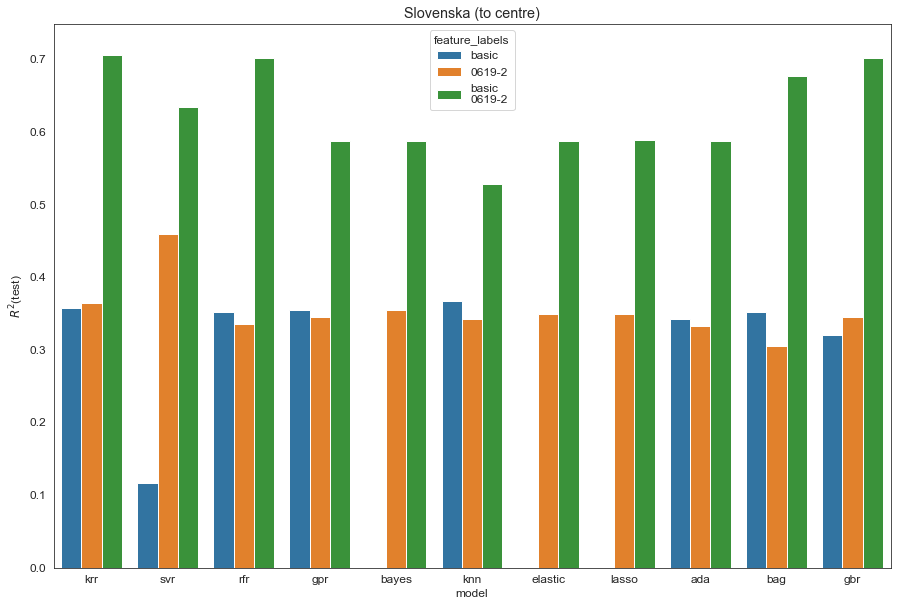

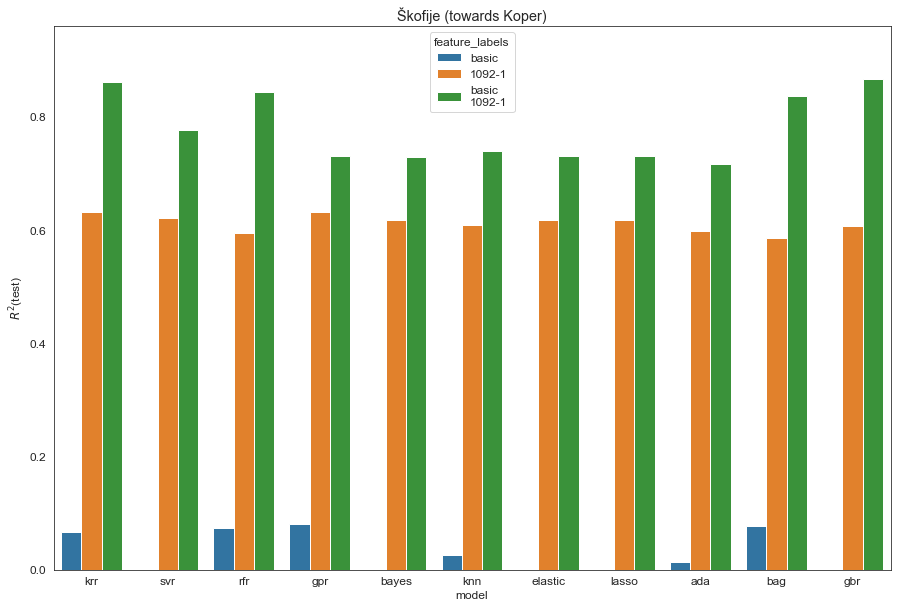

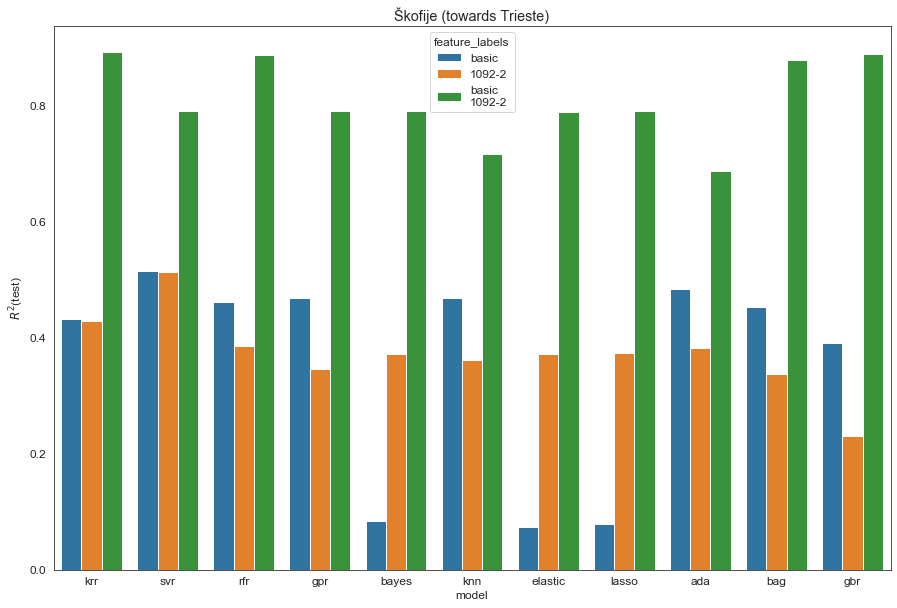

In [25]:
#for route in df.route.unique():
for route in routes:
    try:
        df2 = df[df['route'] == route]
        sns.barplot(data=df2, x="model", y="R2_test", hue="feature_labels")
        y1,y2 = plt.ylim()
        plt.ylim((max(0,y1),y2))
        plt.title(route)
        plt.ylabel("$R^2$(test)")

        f = plt.gcf()
        f.set_size_inches(15, 10)

        plt.savefig(f"figs\\models\\models_{route}.pdf", bbox_inches="tight")
        plt.savefig(f"figs\\models\\models_{route}.png", bbox_inches="tight")


        plt.show()
    except:
        pass

In [26]:
#df[(df['route']=='Dunajska1') & (df['feature_labels']=="0655-1")]

### Best features

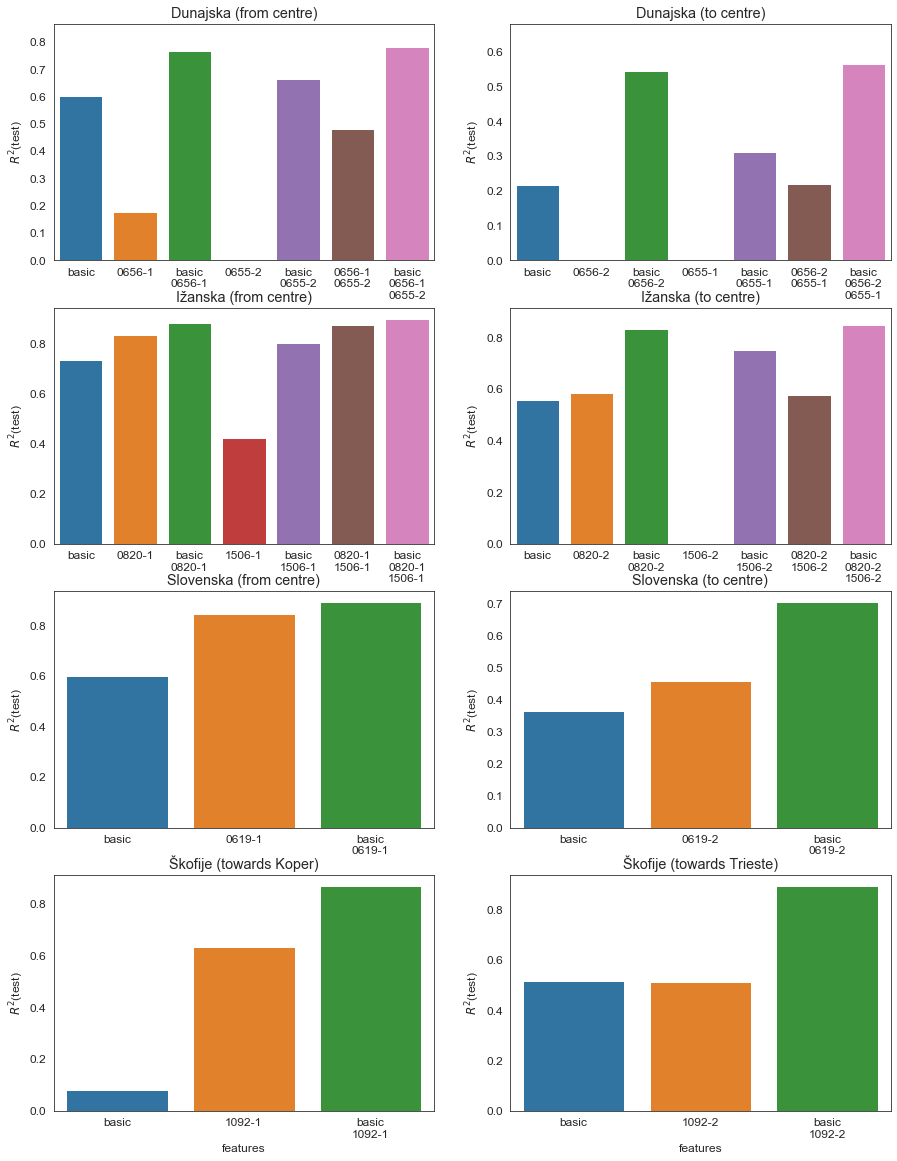

In [27]:
fig, axs = plt.subplots(4, 2, sharey=False)

#for i, (route,ax) in enumerate(zip(df.route.unique(), axs.flatten())):
for i, (route,ax) in enumerate(zip(routes, axs.flatten())):
    try:
        df2 = df[df['route'] == route]
        df3 = pd.DataFrame()

        for features in df2.feature_labels.unique():
            df_features = df2[df2['feature_labels'] == features]
            df_best_model = df_features[df_features['R2_test'] == df_features['R2_test'].max()]
            df3 = df3.append(df_best_model, ignore_index=True)
            #print(df_best_model.model)

        sns.barplot(data=df3, x="feature_labels", y="R2_test", ax=ax)

        #fig = plt.gcf()
        #fig.setsiz
        y1,y2 = ax.get_ylim()
        ax.set_ylim((max(0,y1),y2))


        ax.set_title(route)
        ax.set_ylabel("$R^2$(test)")
        if i < 6:
            ax.set_xlabel("")
        else:
            ax.set_xlabel("features")
    except:
        pass


fig.set_size_inches(15, 20)  

plt.savefig("figs\\models\\features.pdf", bbox_inches="tight")
plt.savefig("figs\\models\\features.png", bbox_inches="tight")

plt.show()
    
    

    

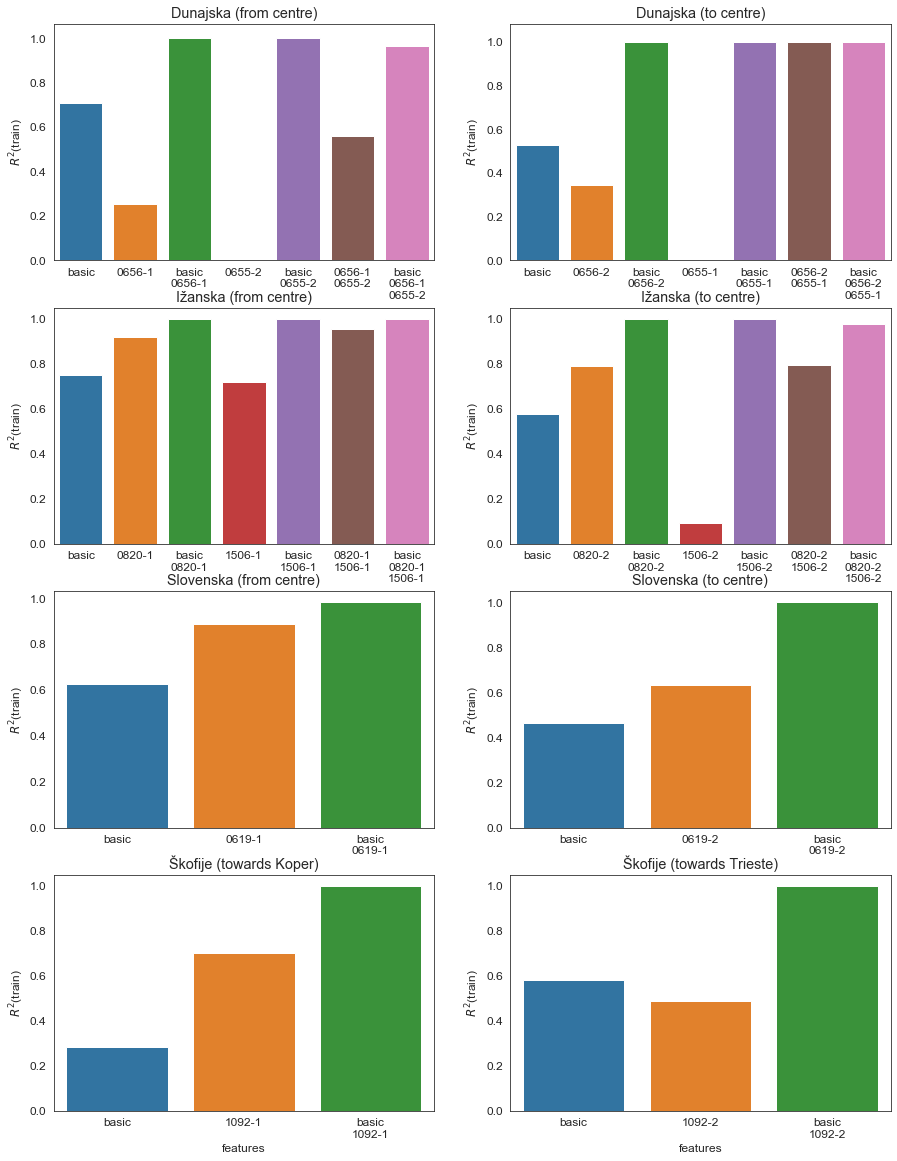

In [28]:
fig, axs = plt.subplots(4, 2, sharey=False)

#for i, (route,ax) in enumerate(zip(df.route.unique(), axs.flatten())):
for i, (route,ax) in enumerate(zip(routes, axs.flatten())):
    try:
        df2 = df[df['route'] == route]
        df3 = pd.DataFrame()

        for features in df2.feature_labels.unique():
            df_features = df2[df2['feature_labels'] == features]
            df_best_model = df_features[df_features['R2_train'] == df_features['R2_train'].max()]
            df3 = df3.append(df_best_model, ignore_index=True)
            #print(df_best_model.model)

        sns.barplot(data=df3, x="feature_labels", y="R2_train", ax=ax)

        #fig = plt.gcf()
        #fig.setsiz
        y1,y2 = ax.get_ylim()
        ax.set_ylim((max(0,y1),y2))


        ax.set_title(route)
        ax.set_ylabel("$R^2$(train)")
        if i < 6:
            ax.set_xlabel("")
        else:
            ax.set_xlabel("features")
    except:
        pass


fig.set_size_inches(15, 20)  

plt.savefig("figs\\models\\features_train.pdf", bbox_inches="tight")
plt.savefig("figs\\models\\features_train.png", bbox_inches="tight")

plt.show()
    

### Best models

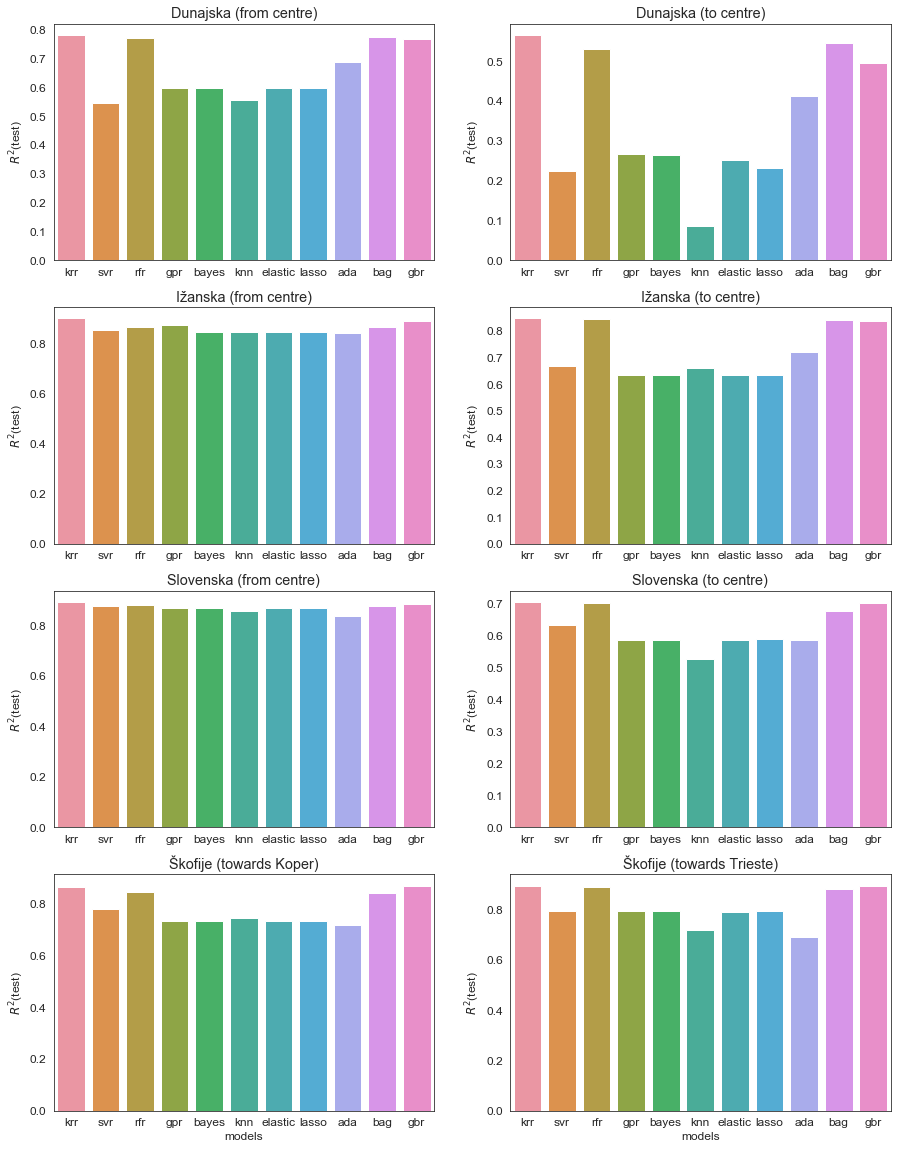

In [29]:
#for features in df.features.unique():
fig, axs = plt.subplots(4, 2, sharey=False)

#for i, (route,ax) in enumerate(zip(df.route.unique(), axs.flatten())):
for i, (route,ax) in enumerate(zip(routes, axs.flatten())):
    try:
        df2 = df[df['route'] == route]
        df3 = pd.DataFrame()

        #features = df2.features.unique()
        #max_feature = sorted(features, key=len, reverse=True)[0]
        #df2 = df2[df2['features']==max_feature]
        for model in df2.model.unique():
            df_model = df2[df2['model'] == model]
            df_best_model = df_model[df_model['R2_test'] == df_model['R2_test'].max()]
            df3 = df3.append(df_best_model, ignore_index=True)
            #print(df_best_model.feature_labels)

        sns.barplot(data=df3, x="model", y="R2_test", ax=ax)
        ax.set_title(route)
        ax.set_ylabel("$R^2$(test)")
        if i < 6:
            ax.set_xlabel("")
        else:
            ax.set_xlabel("models")
    except:
        pass
    
fig.set_size_inches(15, 20)

plt.savefig("figs\\models\\models.pdf", bbox_inches="tight")
plt.savefig("figs\\models\\models.png", bbox_inches="tight")

plt.show()
    

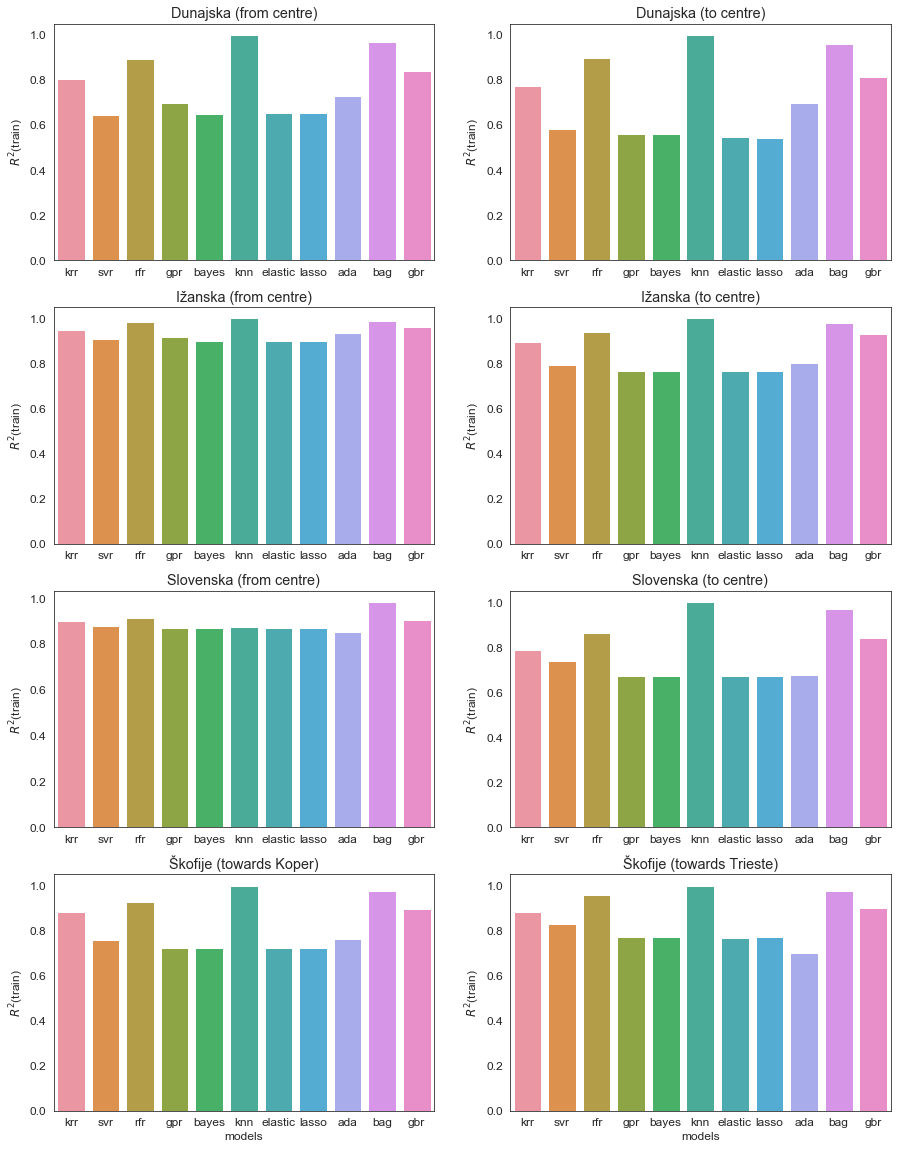

In [31]:
#for features in df.features.unique():
fig, axs = plt.subplots(4, 2, sharey=False)

#for i, (route,ax) in enumerate(zip(df.route.unique(), axs.flatten())):
for i, (route,ax) in enumerate(zip(routes, axs.flatten())):
    try:
        df2 = df[df['route'] == route]
        df3 = pd.DataFrame()

        #features = df2.features.unique()
        #max_feature = sorted(features, key=len, reverse=True)[0]
        #df2 = df2[df2['features']==max_feature]
        for model in df2.model.unique():
            df_model = df2[df2['model'] == model]
            df_best_model = df_model[df_model['R2_train'] == df_model['R2_train'].max()]
            df3 = df3.append(df_best_model, ignore_index=True)
            #print(df_best_model.feature_labels)

        sns.barplot(data=df3, x="model", y="R2_train", ax=ax)
        ax.set_title(route)
        ax.set_ylabel("$R^2$(train)")
        if i < 6:
            ax.set_xlabel("")
        else:
            ax.set_xlabel("models")
    except:
        pass
    
fig.set_size_inches(15, 20)

plt.savefig("figs\\models\\models_train.pdf", bbox_inches="tight")
plt.savefig("figs\\models\\models_train.png", bbox_inches="tight")

plt.show()

### Best results

In [33]:
df_best = pd.read_csv("regression_results_best.csv")
df_best['feature_labels'] = df_best['features'].map(lambda x: set_feature_labels(x, sep=", "))
df_best['R2_test'] = round(df_best['R2_test'],3)
df_best['R2_train'] = round(df_best['R2_train'],3)
df_best = df_best[['route', 'feature_labels','model', 'R2_train','R2_test']]
df_best.columns = ['segment', 'features', 'best model', 'R2(train)', 'R2(test)']


In [34]:
f = open("best_results.txt", "w")

print(df_best.to_latex(index=False), file=f)

f.close()

In [36]:
df_best

,segment,features,best model,R2(train),R2(test)
0,Dunajska (from centre),"basic, 0656-1, 0655-2",krr,0.803,0.782
1,Dunajska (to centre),"basic, 0656-2, 0655-1",krr,0.774,0.566
2,Ižanska (from centre),"basic, 0820-1, 1506-1",krr,0.947,0.899
3,Ižanska (to centre),"basic, 0820-2, 1506-2",krr,0.894,0.846
4,Slovenska (from centre),"basic, 0619-1",krr,0.898,0.892
5,Slovenska (to centre),"basic, 0619-2",krr,0.785,0.706
6,Škofije (towards Koper),"basic, 1092-1",gbr,0.895,0.867
7,Škofije (towards Trieste),"basic, 1092-2",krr,0.885,0.892
